In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Parse top 10 violations from DFPS portal

In [2]:
# DCL 4.5 Top 10 Standards Deficiencies FY09-FY17
dat = pd.read_csv(
    'https://data.texas.gov/api/views/hesh-m7cs/rows.csv?accessType=DOWNLOAD'
).rename(
    columns = lambda x: x.replace(' ', '')
)

### Normalize by operations

In [3]:
# DCL 2.2 Operations During Fiscal Year By Operation Type and County FY08-FY17
dat_operation_counts = pd.read_csv(
    'https://data.texas.gov/api/views/mxh9-nxm6/rows.csv?accessType=DOWNLOAD'
).rename(
    columns = lambda x: x.replace(' ', '')
)

In [4]:
dat_violation_operation = dat.query(
    'RuleNumber == "746.1601"'
).set_index('FiscalYear').join(
    dat_operation_counts.query(
        'OperationType == "LCCC-Child Care Program"'
    ).query(
        'Region == "STATEWIDE"'
    ).groupby(
        'FiscalYear'
    ).NumberofOperations.sum(),
    how='outer'
)
# .to_csv('../export/ratio_violations.csv')

dat_violation_operation

,OperationType,Rank,RuleNumber,NumberofDeficiencies,PercentofTotal,NumberofOperations
FiscalYear,,,,,,
2010,Licensed Centers,7,746.1601,921,1%,NaN
2011,Licensed Centers,9,746.1601,872,0.9%,8019.0
2012,Licensed Centers,9,746.1601,839,0.9%,8104.0
2013,Licensed Centers,9,746.1601,937,1%,7976.0
2014,Licensed Centers,7,746.1601,885,1.1%,7941.0
2015,Licensed Centers,7,746.1601,861,1.3%,7888.0
2016,Licensed Centers,8,746.1601,659,1.1%,7957.0
2017,Licensed Centers,9,746.1601,611,1%,7991.0


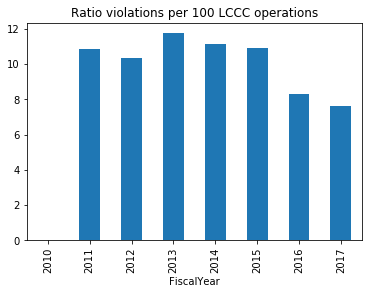

In [5]:
dat_violation_operation.assign(
    ratio_ratio = lambda x: x.NumberofDeficiencies / (x.NumberofOperations / 100)
).ratio_ratio.plot(kind='bar')

plt.title('Ratio violations per 100 LCCC operations')

plt.show()

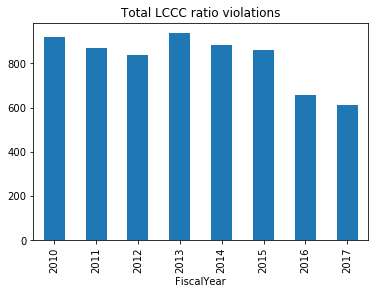

In [6]:
dat_violation_operation.assign(
    ratio_ratio = lambda x: x.NumberofDeficiencies
).ratio_ratio.plot(kind='bar')

plt.title('Total LCCC ratio violations')

plt.show()